<img src="./resources/cropped-SummerWorkshop_Header.png">  
<h1 align="center">Workshop SWDB 2023 </h1> 
<h2 align="center">Day 3: K-means clustering </h2> 
<h3 align="center">Thursday, June 14th, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>Machine learning has many canonical problem types that we will discuss in these tutorials. These include Regression, Classification, Clustering, and Dimension Reduction. This tutorial is focused on Clustering.

<p>K-means clustering is an example of a unsupervised learning problem. It is automatic grouping of similiar objects into sets without using labels. In a clustering problem, we are given $N$ data points $\vec{x}_i$ where $i \in [1,N]$, where each data point is a d-dimensional real vextor. We want to partition the $N$ data points into $K (\leq N)$ sets $S = {S_1, S_2, ..., S_K}$ as to minizie the within-cluster sum of squares (i.e. variance). The objective is to find:
    
$\operatorname*{argmin}_S \sum_{i=1}^{K}\sum_{\vec{x} \in S_i} \| \vec{x} - \mu_i \|^2 = \operatorname*{argmin}_S \sum_{i=1}^{K} |S_i| Var S_i$
    
where $\mu_i$ is the mean (also called centroid) of the points in $S_i$, i.e.
    
$\mu_i = \frac{1}{|S_i|}\sum_{\vec{x}\in S_i} \vec{x}$

where $|S_i|$ is the size of $S_i$, and $||.||$ is the $L^2$ norm. 
    
<p>
    This particular problem has an exact analytic solution that is easy to implement, but in this tutorial, we will look at how to perform regression using the `scikit-learn` Python package.  `scikit-learn` has many regression algorithms in common use built in, most of which do not have simple analytic solutions.  In addition, other packages have adopted the `scikit-learn` style interface.  One advantage of this is that multiple algorithms can be deployed with the same code.

The `scikit-learn` website:  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Source wiki website: https://en.wikipedia.org/wiki/K-means_clustering
</p>
    
</div>

<img src="./resources/K-means example.png">

##### 1. k initial "means" (in this case k=3) are randomly generated within the data domain (shown in color).

##### 2. k clusters are created by associating every observation with the nearest mean. The partitions here represent the Voronoi diagram generated by the means.

##### 3. The centroid of each of the k clusters becomes the new mean.

##### 4. Steps 2 and 3 are repeated until convergence has been reached.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p> Please keep dependencies to the absolute minimum!  
    
<p> This is both to make it less likely we encounter problems and to minimize the firehose problem for students who are newer to Python.  You might want to use some fancy visualization package or something else, but that's one more thing in the brain of a complete beginner.
    
<p> If you *must* introduce a dependency that is not covered elsewhere, you need to describe it to students so that they know what it is.  We will need to coordinate this across dataset presentations so that we can distribute introductions to useful aspects of Python not covered in the Bootcamp across the days.  Remember that this is a secondary function of these notebooks, though, so don't get bogged down introducing cool Python tricks and tools.
    
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

##### let's start Let's start by actually implementing this algorithm on some toy data. You may notice how clustering is formed

In [60]:
# create 2-D toy data
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [61]:
# print shape of X
X.shape

(6, 2)

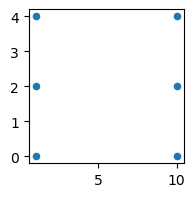

In [62]:
# Visualize X
plt.figure(figsize=(2,2))
plt.scatter(X[:,0],X[:,1], s = 20)

##### using scikit-learn built in k-means clustering function

In [21]:
# Determines number of clusters K
K = 2

In [20]:
# Determines random number generation for centroid initialization
random_state = 0

In [22]:
# Determines method for initilization ('k-means++', 'random')
# ‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability
# distribution of the points’ contribution to the overall inertia. 
# ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.
init = 'k-means++'

In [23]:
# Determines number of times the k-means algorithm is run with different centroid seeds.
# When n_init='auto', the number of runs depends on the value of init: 10 if using init='random', 
# 1 if using init='k-means++'.
n_init = 'auto'

In [48]:
# run k-means clustering
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X)

In [25]:
# print cluster labels for each data points

print(kmeans.labels_)

[1 1 1 0 0 0]


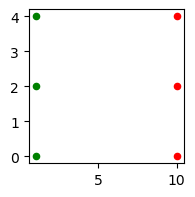

In [32]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='green')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='red')

In [51]:
# now play with number of clusters K
K = 3

In [47]:
# run k-means clustering
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X)

In [36]:
# print cluster labels for each data points
print(kmeans.labels_)

[1 1 1 0 0 2]


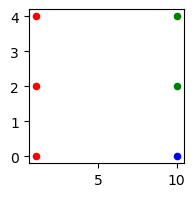

In [37]:
# visualize the clustering results
plt.figure(figsize=(2,2))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.1:</b>  How about larger K?
</div>

In [76]:
K = 4

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.2:</b>  How about different random initializations?
</div>

In [ ]:
random_state = ?
init = ?
n_init = ?

##### Now let's try some larger scale 2D dataset. 

In [91]:
# Set the random seed for reproducibility
np.random.seed(0)

# Number of points
n_points = 100

# data point dimension
D_dim = 2

# Generate random 2D points
X = np.random.rand(n_points, D_dim)

In [92]:
# print shape of X
X.shape

(100, 2)

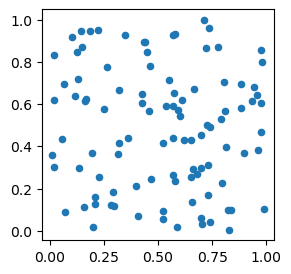

In [93]:
# Visualize X
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1], s = 20)

In [94]:
# run k-means clustering when number of clusters K = 3
K = 3 
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X)

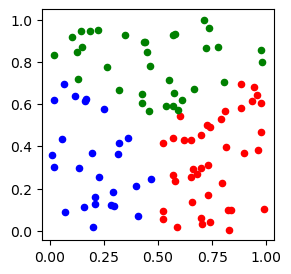

In [95]:
# visualize the clustering results
plt.figure(figsize=(3,3))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Task 1.3:</b>  run k-means clustering when number of clusters K = 5?
</div>

In [96]:
# run k-means clustering when number of clusters K = 5
K = 5
kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X)

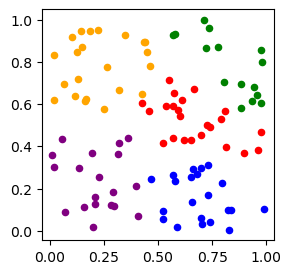

In [97]:
# visualize the clustering results
plt.figure(figsize=(3,3))
plt.scatter(X[kmeans.labels_==4,0], X[kmeans.labels_==4,1], s = 20, c ='orange')
plt.scatter(X[kmeans.labels_==3,0], X[kmeans.labels_==3,1], s = 20, c ='purple')
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Question 1.1:</b>  Which K is better? How to evaluate the clustering results?
</div>

##### Now let's try some larger scale dataset with feature dim is larger than 2. 

In [98]:
# Set the random seed for reproducibility
np.random.seed(0)

# Number of points
n_points = 100

# data point dimension
D_dim = 10

# Generate random points with D dimensions
X = np.random.rand(n_points, D_dim)

In [100]:
# print shape of X
X.shape

(100, 10)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Question 1.2:</b>  How to visualize the 10-dim dataset?
</div>

##### we could just visualize the first two dimensions

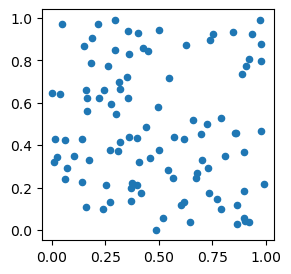

In [115]:
# visualize clustering results on the only the first two dimensions
plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], s = 20)

In [124]:
# run k-means clustering for data X
# chosse number of clusters K = 3
K = 3
%time kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X)

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 10.5 ms


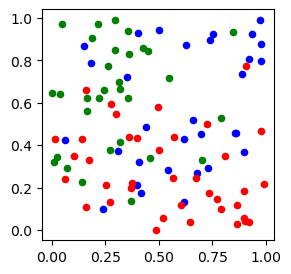

In [125]:
# visualize clustering results on the only the first two dimensions
plt.figure(figsize=(3,3))
plt.scatter(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Question 1.3:</b>  Why does the clustering fail?
</div>

##### or we could use PCA for dimensionality reduction

In [103]:
# import built-in PCA functions from scikit-learn
from sklearn.decomposition import PCA

In [105]:
# determines the number of components to keep
n_components = 2
pca = PCA(n_components = n_components)

In [119]:
# fit PCA to X and output X_reduce with 2 dimensions
X_reduce = pca.fit_transform(X)

In [108]:
# print shape of X_reduce
X_reduce.shape

(100, 2)

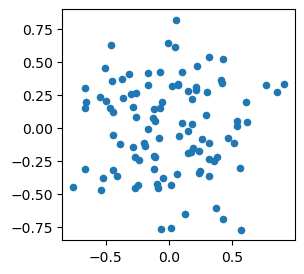

In [109]:
# Visualize X_reduce
plt.figure(figsize=(3,3))
plt.scatter(X_reduce[:,0],X_reduce[:,1], s = 20)

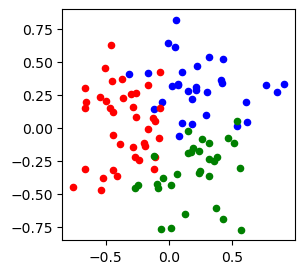

In [117]:
# Now visualize clustering results with dimenison reduced version
plt.figure(figsize=(3,3))
plt.scatter(X_reduce[kmeans.labels_==2,0], X_reduce[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X_reduce[kmeans.labels_==1,0], X_reduce[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X_reduce[kmeans.labels_==0,0], X_reduce[kmeans.labels_==0,1], s = 20, c ='green')

In [128]:
# run k-means clustering for original data X after dimensionality reduction
# chosse number of clusters K = 3
K = 3
%time kmeans = KMeans(n_clusters=K, random_state=random_state, init = init, n_init=n_init).fit(X_reduce)

CPU times: user 18.7 ms, sys: 0 ns, total: 18.7 ms
Wall time: 8.29 ms


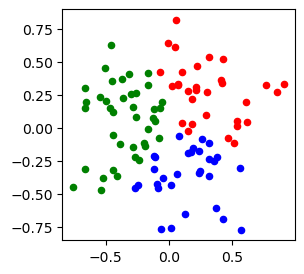

In [130]:
# Now visualize clustering results with dimenison reduced firstly
plt.figure(figsize=(3,3))
plt.scatter(X_reduce[kmeans.labels_==2,0], X_reduce[kmeans.labels_==2,1], s = 20, c ='blue')
plt.scatter(X_reduce[kmeans.labels_==1,0], X_reduce[kmeans.labels_==1,1], s = 20, c ='red')
plt.scatter(X_reduce[kmeans.labels_==0,0], X_reduce[kmeans.labels_==0,1], s = 20, c ='green')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Question 1.4:</b>  When will the K-means clustering fail?
</div>

##### overview of different clustering methods

<img src="./resources/sphx_glr_plot_cluster_comparison_001.png">

##### give ground truth clusters?
##### teach PCA?
##### teach UMAP?
##### teach EM for mixture models?

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Problem Sets </h2>
    
<p>This section is an ~3 hour session (around 3:00 - 6:00) during (a portion of) which students will work on a problem set, either alone or in groups, as they please, with TAs helping out and answering questions as needed.
    
<p>  This section will use one or more notebooks.  The structure of these notebooks is very simple.  It will be a list of exercises with whatever explanation is needed for the context of the exercise.
    
<p> There will be more problems than any single student can work through alone.  The intent is for the problems to provide directions into either the methods or the data for students to expand their knowledge based on their interest.  You should provide problems that dig into alternative models and aspects of the data that could not be covered in the main presentation. Each student should follow their own curiosity.  
    
<p> For example:
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.1: Plot the distribution of reaction times for go trials from one session</b>

<p> 1) get the <code>trials</code> dataframe from the session object. 
    
<p> 2) Filter the trials dataframe to get go trials only. 
    
<p> 3) Use the values of the <code>response_latency</code> column to plot a histogram of reaction times. 
    
<p> <code>response_latency</code> is the first lick time, in seconds, relative to the change time. 
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> You have some freedom in how you want to format this.  You can set up exercises in multiple parts to lead students stepwise through an analysis and thus have exercises 1.1, 1.2, etc. or you can have independent lists of problems that don't connect.  The important goal is to get students to engage with that day's question in some complex way to demonstrate how to perform an analysis of interest.  
    
<p> One of the difficulties you will face but not be aware of until you see students work through your notebook is that your audience has a variety of backgrounds and expertise, particularly with Python itself.  Be careful to target your exercises for this range.  Some should be accessible to relative or complete beginners in Python.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3> Solution Set </h3>
<p>  You will also need to provide a separate solution set for (some of) these notebooks, so that students can have a reference or self study guide.  In addition, save an html version of the solution set notebook so that there will be an unalterable version in case students play around with the solution notebook.  It will probably not be practical to have detailed solutions for every single problem, so be mindful of what problems should have detailed solutions and what problems would provide good examples.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> After Dinner Session</h2>
   
The last session, which will convene after dinner, serves a few purposes.
    
<ul>
<li> Answering any questions that students have.
<li> Demonstrating any solutions that might be useful for everyone to see or talk through.
<li> Providing examples of recent literature that uses the demonstrated methods.
<li> Outlining potential longer problems that could be the basis of projects
<li> Developing project ideas
</ul>
    
<p> We will coordinate these sessions across days in the larger groups, but put some thought into what makes sense for your day.
    
<!-- <p>The hard part of this section is the last two points.  Your group can decide in advance or on the day of the event whether certain solutions should be highlighted.  What you need to prepare are lists of more involved problems (e.g. these could be problems that you didn't include in the Problem Set above) and providing potential project ideas.  
    
<p> Construct a slide or slides of a few project ideas for your dataset and take a few minutes to talk through these ideas with the students at this session. -->
    
</div>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1> A few more things </h1>
    
<p> Keep things as simple as possible!  If you don't need a module or method to illustrate the concepts you're aiming to teach, leave it out.  
<p> One note on simplicity:  be careful not to get students bogged down in complex visualizations where they spend all their time struggling with matplotlib or something.  
    
<p> Be VERY mindful of what might be distracting for a student in both cognitive and technical terms.  It's impossible to hold everyone's attention and harder for people to learn something if TAs have to run around fixing technical issues.
    
<p> If there is a method or tool that you *really* want to show students but isn't part of the main thrust of the notebook, please consider a problem for the Problem Set or an entry in our Jupyter Book.

    
<p> All of this material will be put into a github repo at <a href="https://github.com/AllenInstitute/swdb_2023">SWDB 2023 GitHub repo</a>, including this template (until the course starts).
    
<p> Please work on a fork on this repo for your group.
        
<p>  Please be aware that jupyter notebooks can be finicky with git.  We've had situations in the past where people have accidentally erased other people's work.  Please be mindful of your commits and backup your work just in case.  

</div>